In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from matplotlib.pyplot import subplots
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
'''from ISLP import load_data
from ISLP.models import ModelSpec as MS'''
from functools import partial

In [2]:
data = pd.read_csv("data2.csv.gz")
data

,label,0,1,2,3,4,5,6,7,8,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
0,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
796,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
797,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
798,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.shape

(800, 100001)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Columns: 100001 entries, label to 99999
dtypes: int64(100001)
memory usage: 610.4 MB


In [5]:
summary = data.describe()
summary

,label,0,1,2,3,4,5,6,7,8,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
count,800.000000,800.000000,800.0,800.000000,800.0,800.000000,800.000000,800.000000,800.000000,800.000000,...,800.000000,800.000000,800.0,800.000000,800.0,800.000000,800.000000,800.000000,800.000000,800.000000
mean,-0.805000,0.012500,0.0,0.001250,0.0,0.020000,0.003750,0.017500,0.001250,0.006250,...,0.013750,0.007500,0.0,0.001250,0.0,0.006250,0.007500,0.012500,0.006250,0.035000
std,0.593646,0.111172,0.0,0.035355,0.0,0.140088,0.061161,0.131207,0.035355,0.078859,...,0.116524,0.086331,0.0,0.035355,0.0,0.078859,0.086331,0.111172,0.078859,0.183895
min,-1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#check if the data has any null values:
print("Total missing values: ", data.isnull().sum().sum())

Total missing values:  0


In [3]:
#the first column has the target values, while the other columns are features
Y = data.iloc[:, 0]
X = data.iloc[:, 1:]

label
-1    722
 1     78
Name: count, dtype: int64


<Axes: xlabel='label', ylabel='count'>

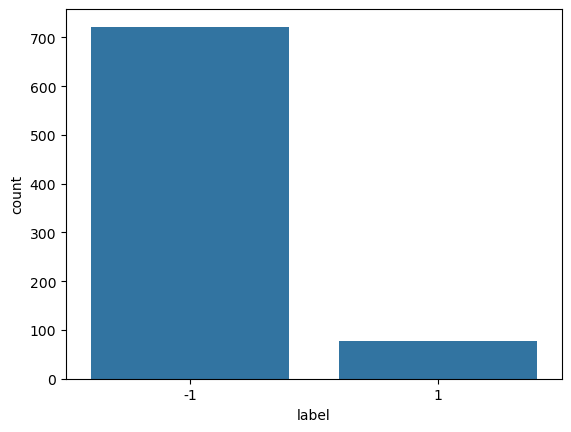

In [8]:
#check if the balance of the data:
print(Y.value_counts())
sns.countplot(x=Y)

In [12]:
print(Y.value_counts(normalize=True))

label
-1    0.9025
 1    0.0975
Name: proportion, dtype: float64


The above plot shows that the data is imbalanced and it may needs to be oversampled to handle the imbalance. Models trained on imbalanced data may become biased toward the majority class, ignoring the minority class.

In [10]:
sparsity = (X == 0).sum().sum() / (X.shape[0] * X.shape[1])
print(f"Sparsity: {sparsity * 100:.2f}%")

Sparsity: 99.09%


We split the data into train and test data:

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

We first reduce the dimensionality of the data based on the variance, some columns have 0 variance maening the specific feature has the same value for all the observations, this is useless for the classification so we get rid of these columns:

In [18]:
selector = VarianceThreshold(threshold=0.0001)
X_train_reduced = selector.fit_transform(X_train)
X_test_reduced = selector.transform(X_test)

In [19]:
print(X_train.shape)
print(X_train_reduced.shape)

(640, 100000)
(640, 85585)


In [22]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn import linear_model
logr = linear_model.LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

In [23]:
sfs1 = sfs(
    estimator=logr,
    k_features=10,                # Select the top 10 features
    forward=True,                 # Perform forward selection
    floating=False,               # Disable dynamic feature adjustment
    scoring='balanced_accuracy',  # Metric for feature subset evaluation
    cv=5,                         # 5-fold cross-validation
    n_jobs=-1,                    # Use all CPU cores
    verbose=2                     # Display progress
)

In [24]:
sfs1 = sfs1.fit(X_train_reduced, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:   50.9s
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 9097 tasks      | e

In [31]:
sfs1.get_metric_dict()

AttributeError: SequentialFeatureSelector has not been fitted, yet.

In [32]:
# Check if any subsets were evaluated
if sfs1.subsets_:
    # Get the last successfully evaluated subset
    best_iteration = max(sfs1.subsets_.keys())  # Last completed iteration
    best_subset = sfs1.subsets_[best_iteration]  # Details of the subset

    # Extract feature indices and names
    selected_feature_indices = best_subset['feature_idx']
    selected_feature_names = [X_train.columns[i] for i in selected_feature_indices]

    # Extract score
    best_score = best_subset['avg_score']

    print(f"Selected Feature Indices: {selected_feature_indices}")
    print(f"Selected Feature Names: {selected_feature_names}")
    print(f"Best Score: {best_score}")
else:
    print("No iterations were completed before stopping.")

Selected Feature Indices: (352, 4900, 9682, 32549, 59352)
Selected Feature Names: ['352', '4900', '9682', '32549', '59352']
Best Score: 0.9008538038672971


In [25]:
selected_features = list(sfs1.k_feature_names_)
print(f"Selected Features: {selected_features}")

TypeError: 'NoneType' object is not iterable

In [33]:
# Best cross-validation score during feature selection
print(f"Best Balanced Accuracy (CV): {sfs1.k_score_}")

Best Balanced Accuracy (CV): None


In [34]:
# Transform the dataset to include only selected features
X_train_selected = sfs1.transform(X_train_reduced)
X_test_selected = sfs1.transform(X_test_reduced)

AttributeError: SequentialFeatureSelector has not been fitted, yet.

In [ ]:
logr.fit(X_train_selected, y_train)
y_pred = logr.predict(X_test_selected)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
sfs1 = sfs(logr, k_features=100, forward=True, verbose=2, scoring='neg_mean_squared_error')

In [21]:
from itertools import combinations

def get_subsets(features, max_size=100):
    subsets = []
    for size in range(1, max_size + 1):
        subsets += list(combinations(features, size))
    return subsets

feature_indices = list(range(X_train_reduced.shape[1]))
subsets = get_subsets(feature_indices, max_size=100)

MemoryError: 

In [12]:
def nCp(sigma2 , estimator , X, Y):
    n, p = X.shape
    Yhat = estimator.predict(X)
    RSS = np.sum((Y - Yhat)**2)
    return -(RSS + 2 * p * sigma2) / n

In [ ]:
'''design = MS(train.columns).fit(train)
Y = np.array(Hitters['Salary'])
X = design.transform(Hitters)'''
sigma2 = OLS(Y,X).fit().scale

## PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=500)

principal_components = pca.fit_transform(X_train)

In [10]:
principaldf = pd.DataFrame(data=principal_components)

In [15]:
principaldf

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-1.178489,-0.474273,-0.765778,-0.131534,-0.077507,-0.433843,-0.210332,-0.244735,-0.158330,-0.255646,...,0.160873,-0.513419,-0.224967,-0.635626,-0.220203,-0.487629,0.564610,0.182215,0.456518,0.134281
1,-1.080639,-0.293758,-0.755341,-0.132647,0.146146,-0.282924,-0.283386,-0.358742,-0.064806,0.060605,...,0.104123,-0.562620,-0.244303,0.455076,0.049672,0.441947,0.074126,0.203863,-0.120814,-0.823686
2,-1.076431,-0.298126,-0.498818,-0.164038,-0.029060,-0.514594,-0.293304,-0.341241,-0.015657,0.010218,...,-0.034700,-0.469389,-0.133481,0.664642,0.296006,-0.067860,0.276332,0.729910,-0.072499,-0.211242
3,-1.155537,-0.451935,-0.613453,-0.291115,-0.141129,-0.240122,-0.285656,0.076946,-0.300892,-0.030311,...,0.276214,0.438824,-0.570095,-0.032436,0.450683,-0.261239,-0.698783,-0.518535,0.148738,-0.314266
4,5.204194,4.723044,6.610790,0.761641,0.736286,5.023389,3.082906,-0.143941,0.315782,14.879368,...,2.081285,3.194501,-2.662930,1.394851,-0.423174,0.899913,1.255903,2.628313,0.001709,-0.721305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,-1.029183,-0.547224,-0.592080,-0.353856,-0.050969,-0.568232,0.471156,-0.116129,-0.195849,-0.037724,...,-0.150576,0.885038,-0.659641,-0.268652,-0.711683,-0.347701,-1.126549,0.519701,-0.381808,0.353994
636,-1.137151,-0.519286,-0.606430,-0.203884,0.064072,-0.209738,-0.247093,0.117090,-0.176081,0.026966,...,0.406554,0.620356,0.026332,-0.357093,-0.352925,0.424834,0.131505,0.691240,0.251360,-0.377632
637,-1.208783,-0.545303,-0.705239,-0.381432,0.019572,-0.423330,-0.145183,0.038672,-0.295991,0.093891,...,-0.053963,-0.077149,0.122247,0.421765,-0.198711,-0.101709,-0.378861,-0.342576,-0.276484,-0.078438
638,-0.764002,-0.016923,-0.009799,-0.165166,-0.071853,-0.462699,-0.339447,0.096637,-0.022111,-0.350523,...,-0.107755,0.367198,-0.539252,-0.655341,-0.526459,-0.578257,-0.235620,0.383166,0.084013,-0.071681


In [16]:
pca.explained_variance_ratio_.sum()

0.8367391594028362

In [18]:
pca_ = PCA(.9)

pca_.fit(X_train)

PCA(n_components=0.9)

In [19]:
pca_.n_components_

546

In [ ]:
#The explained variance ratio showcases the amount of variance that was preserved by each feature after the dimensionality reduction, the greater the sum the higher the information retained after the reduction.
pca_.explained_variance_ratio_.sum()

0.9008734080689516

In [ ]:
#after choosing the PCA components, we 
train_pca = pca_.transform(X_train)
test_pca = pca_.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(solver = 'lbfgs')

lgr.fit(train_pca, y_train)

LogisticRegression()

In [27]:
y_predict = lgr.predict(test_pca)

In [24]:
lgr.score(test_pca, y_test)

0.90625

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       0.91      1.00      0.95       144
           1       1.00      0.06      0.12        16

    accuracy                           0.91       160
   macro avg       0.95      0.53      0.53       160
weighted avg       0.92      0.91      0.87       160



## Random Projection

In [52]:
from sklearn import random_projection

In [60]:
rand_prj = random_projection.SparseRandomProjection()
rand_prj.fit(X_train)

SparseRandomProjection()

In [61]:
train_rand = rand_prj.transform(X_train)
test_rand = rand_prj.transform(X_test)

In [62]:
lgr_ = LogisticRegression(solver = 'lbfgs')

lgr_.fit(train_rand, y_train)

LogisticRegression()

In [63]:
lgr_.score(test_rand, y_test)

0.91875

In [65]:
print(test_rand.shape)

(160, 5538)


In [66]:
y_predict = lgr_.predict(test_rand)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       0.92      1.00      0.96       144
           1       1.00      0.19      0.32        16

    accuracy                           0.92       160
   macro avg       0.96      0.59      0.64       160
weighted avg       0.93      0.92      0.89       160



## Feature agglomeration

In [67]:
from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

connectivity = grid_to_graph(*X_train[0].shape)

KeyError: 0